# Error Per Layered Gate (EPLG)

In [1]:
%load_ext autoreload
%autoreload 2

## Set IQM Token if using Resonance.

In [2]:
import os
os.environ["IQM_TOKEN"] = "xxxxxxxxxxxx"

## Choose (or define) a backend

In order to be able to use calibration fidelities as a proxy for selecting a linear chain, we need to specify the calibration URL of the station. If specifying qubit pairs manually, this is not necessary: in this case simply pass the backend as a string name.

In [3]:
# To use calibration fidelities to (automatically) select a linear chain, use the following:
from iqm.qiskit_iqm.iqm_provider import IQMProvider

resonance_station="garnet"
iqm_url=f"https://cocos.resonance.meetiqm.com/{resonance_station}"
cal_url=f"https://api.resonance.meetiqm.com/quantum-computers/v1/{resonance_station}/calibrations"
provider = IQMProvider(iqm_url)
backend = provider.get_backend()

# If manually specifying qubit pairs, use the following:
#backend="garnet"

## Randomized Benchmarking Configuration

NB: Clifford RB is executed by default with Interleaved RB !

In [ ]:
from iqm.benchmarks.randomized_benchmarking.eplg.eplg import *
import numpy as np

In [5]:
EXAMPLE_EPLG = EPLGConfiguration(
    #custom_qubits_array=[[0,1],[1,4],[4,5],[5,6],[6,11],[11,16]],
    drb_depths=sorted(list(set(np.geomspace(1, 200, num=10, endpoint=True, dtype=int).tolist())), reverse=True),
    drb_circuit_samples=25,
    shots=2**8,
    chain_length=19,
    chain_path_samples=200,
    num_disjoint_layers=2,
    max_hamiltonian_path_tries=15,
    calibration_url=cal_url,
)

## Run the experiment

In [6]:
benchmark_eplg = EPLGBenchmark(backend, EXAMPLE_EPLG)
run_eplg = benchmark_eplg.run()

2025-04-02 14:41:57,363 - iqm.benchmarks.logging_config - INFO - Generating linear chain path
2025-04-02 14:41:57,644 - iqm.benchmarks.logging_config - INFO - Extracting the path that maximizes total 2Q calibration fidelity
2025-04-02 14:41:59,026 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries for both systems imported successfully!
2025-04-02 14:41:59,027 - iqm.benchmarks.logging_config - INFO - Executing parallel Direct RB on qubits [(16, 15), (14, 18), (17, 13), (12, 7), (2, 3), (8, 9), (10, 11), (6, 5), (4, 1)] (group 1/2). Will generate and submit all 25 DRB circuits for each depth [200, 111, 61, 34, 18, 10, 5, 3, 1]
2025-04-02 14:41:59,027 - iqm.benchmarks.logging_config - INFO - Depth 200
2025-04-02 14:42:28,138 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [16, 15, 14, 18, 17, 13, 12, 7, 2, 3, 8, 9, 10, 11, 6, 5, 4, 1]
C:\Users\PedroFigueroaRomero\anaconda3\envs\iqm-bench\Lib\site-packages\iqm\qiskit_iqm\iqm_p

## Perform the analysis

In [12]:
result_eplg = benchmark_eplg.analyze()

2025-04-02 14:51:47,848 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [(16, 15), (14, 18), (17, 13), (12, 7), (2, 3), (8, 9), (10, 11), (6, 5), (4, 1)].
2025-04-02 14:51:47,891 - iqm.benchmarks.logging_config - INFO - Depth 200
2025-04-02 14:51:48,011 - iqm.benchmarks.logging_config - INFO - Depth 111
2025-04-02 14:51:48,128 - iqm.benchmarks.logging_config - INFO - Depth 61
2025-04-02 14:51:48,230 - iqm.benchmarks.logging_config - INFO - Depth 34
2025-04-02 14:51:48,312 - iqm.benchmarks.logging_config - INFO - Depth 18
2025-04-02 14:51:48,387 - iqm.benchmarks.logging_config - INFO - Depth 10
2025-04-02 14:51:48,439 - iqm.benchmarks.logging_config - INFO - Depth 5
2025-04-02 14:51:48,484 - iqm.benchmarks.logging_config - INFO - Depth 3
2025-04-02 14:51:48,525 - iqm.benchmarks.logging_config - INFO - Depth 1
2025-04-02 14:51:48,897 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Direct RB on qubits [(15, 14), (18, 17), (13, 12), (

In [13]:
run_eplg.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'max_circuits_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'use_dd', 'dd_strategy', 'qubits_array', 'is_eplg', 'parallel_execution', 'depths', 'num_circuit_samples', 'qiskit_optim_level', 'two_qubit_gate_ensembles', 'densities_2q_gates', 'clifford_sqg_probabilities', 'sqg_gate_ensembles', 'parallel_all_0', 0, 'parallel_all_1', 1, 'backend_coupling_map', 'backend_num_qubits', 'drb_depths', 'drb_circuit_samples', 'custom_qubits_array', 'chain_length', 'chain_path_samples', 'num_disjoint_layers', 'calibration_url', 'disjoint_layers', 'edges'])

In [14]:
for o in result_eplg.observations:
    if o.name != "EPLG":
        print(f"{o.name} {o.identifier.qubit_indices}: {100*o.value:.2f} +/- {100*o.uncertainty:.2f} %")
    else:
        print(f"\n{o.name} {o.identifier.qubit_indices}: {o.value:.2e} +/- {o.uncertainty:.2e}")

average_gate_fidelity (16, 15): 99.45 +/- 0.06 %
average_gate_fidelity (14, 18): 99.16 +/- 0.02 %
average_gate_fidelity (17, 13): 99.16 +/- 0.03 %
average_gate_fidelity (12, 7): 98.80 +/- 0.08 %
average_gate_fidelity (2, 3): 99.12 +/- 0.03 %
average_gate_fidelity (8, 9): 98.84 +/- 0.05 %
average_gate_fidelity (10, 11): 98.85 +/- 0.06 %
average_gate_fidelity (6, 5): 98.47 +/- 0.17 %
average_gate_fidelity (4, 1): 98.89 +/- 0.02 %
average_gate_fidelity (15, 14): 96.90 +/- 0.08 %
average_gate_fidelity (18, 17): 98.21 +/- 0.04 %
average_gate_fidelity (13, 12): 97.47 +/- 0.08 %
average_gate_fidelity (7, 2): 96.85 +/- 0.10 %
average_gate_fidelity (3, 8): 97.00 +/- 0.10 %
average_gate_fidelity (9, 10): 96.49 +/- 0.10 %
average_gate_fidelity (11, 6): 97.71 +/- 0.05 %
average_gate_fidelity (5, 4): 96.34 +/- 0.50 %
average_gate_fidelity (1, 0): 97.70 +/- 0.03 %
layer_fidelity (n_qubits=19): 70.44 +/- 0.43 %
eplg (n_qubits=19): 1.93 +/- 0.03 %


In [15]:
result_eplg.plots.keys()

dict_keys(['edges_graph_disjoint_iqm backend_20250402-144157', '(16, 15)', '(14, 18)', '(17, 13)', '(12, 7)', '(2, 3)', '(8, 9)', '(10, 11)', '(6, 5)', '(4, 1)', '(15, 14)', '(18, 17)', '(13, 12)', '(7, 2)', '(3, 8)', '(9, 10)', '(11, 6)', '(5, 4)', '(1, 0)'])

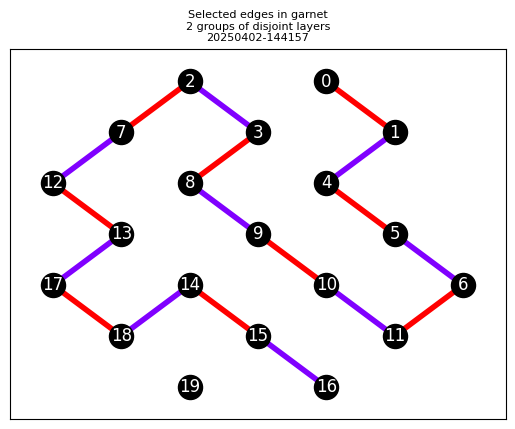

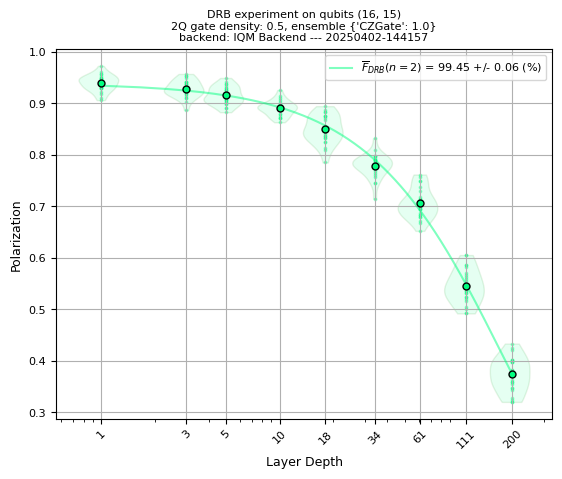

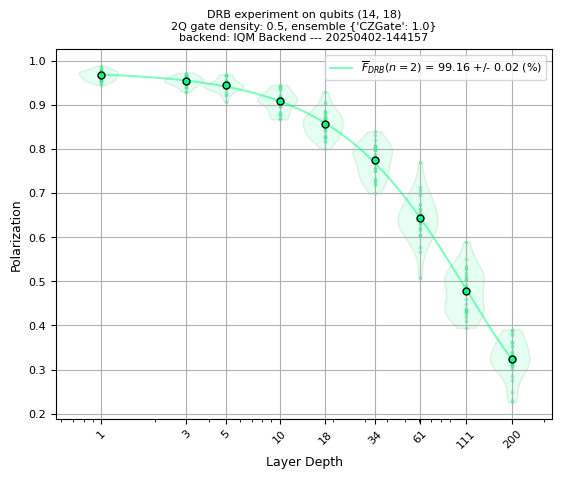

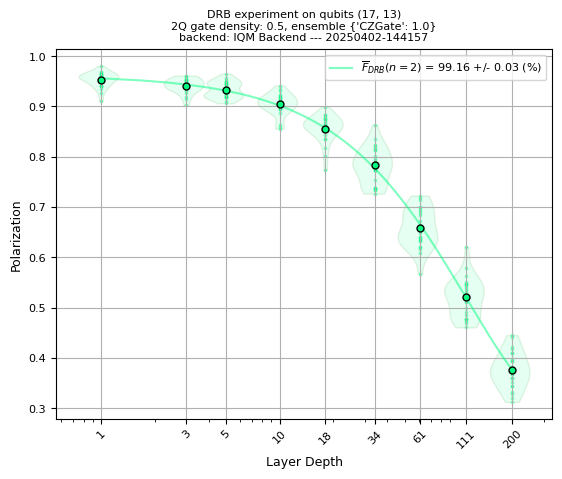

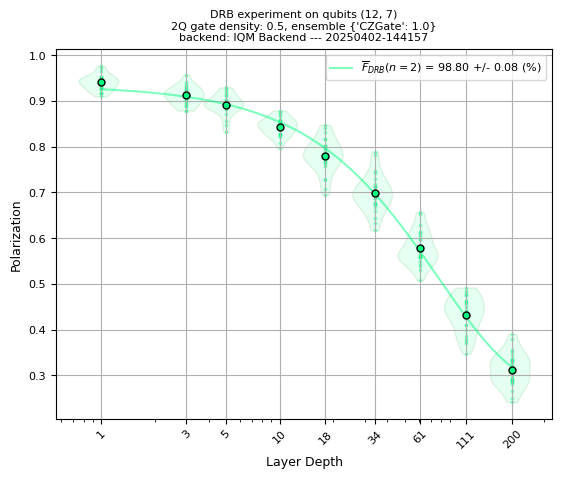

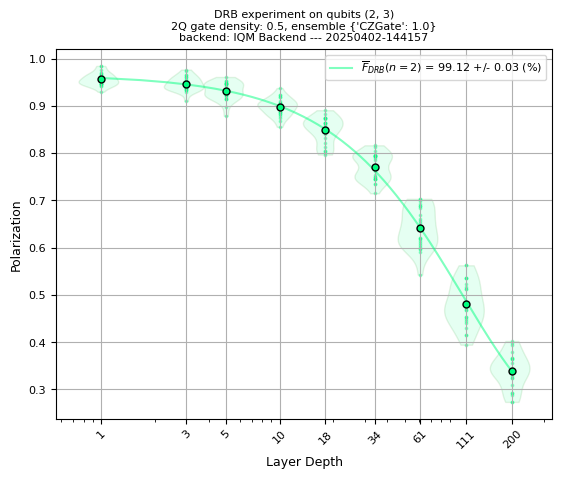

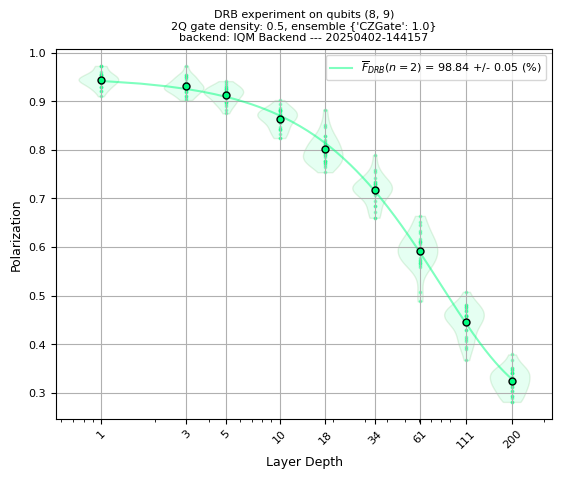

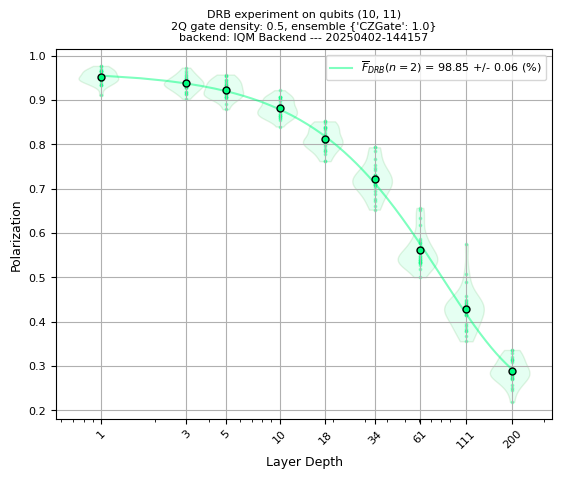

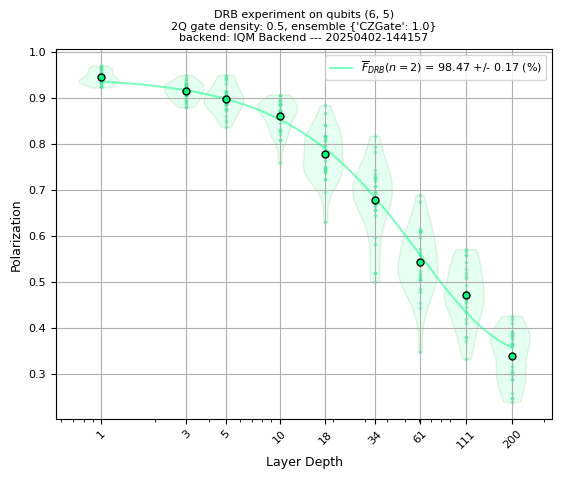

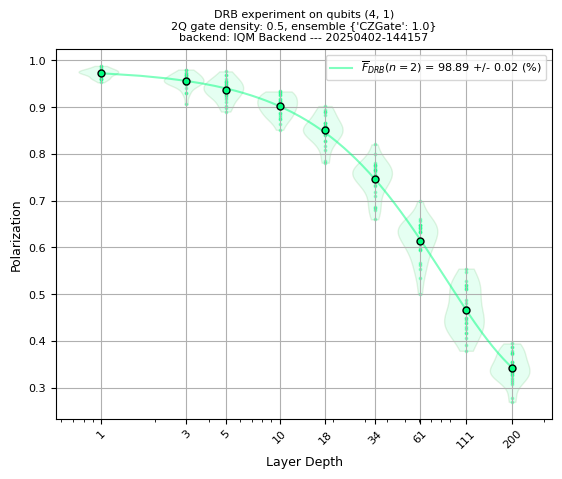

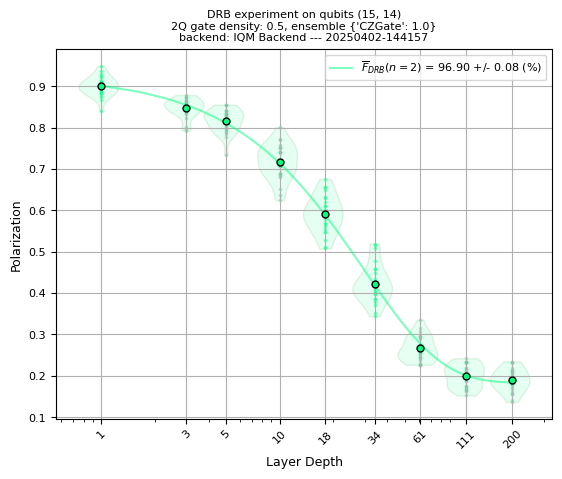

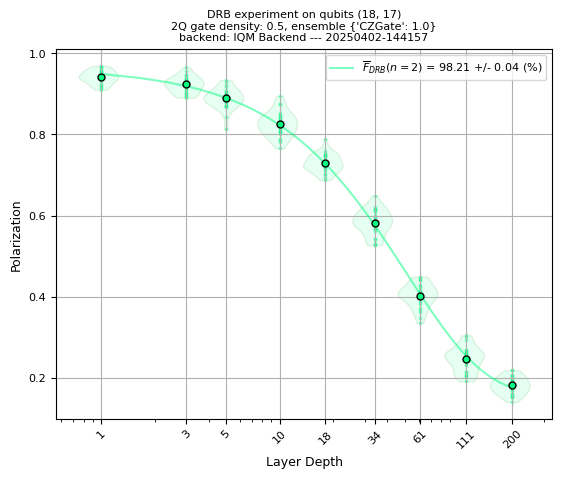

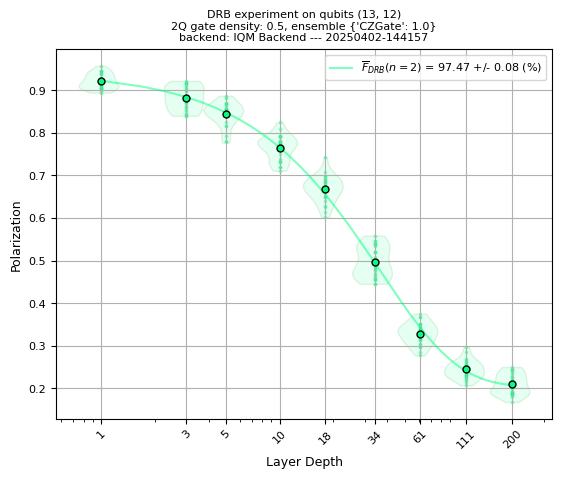

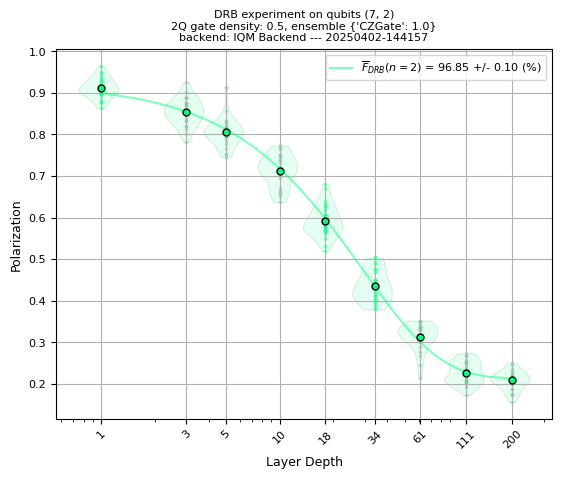

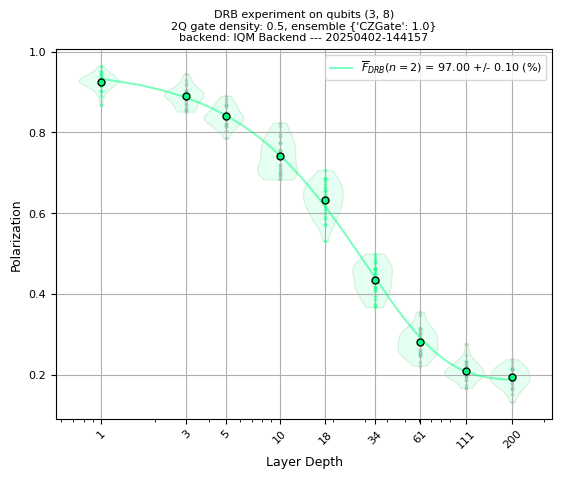

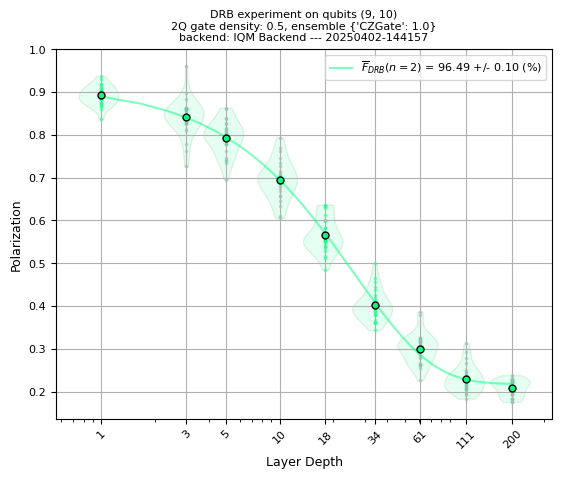

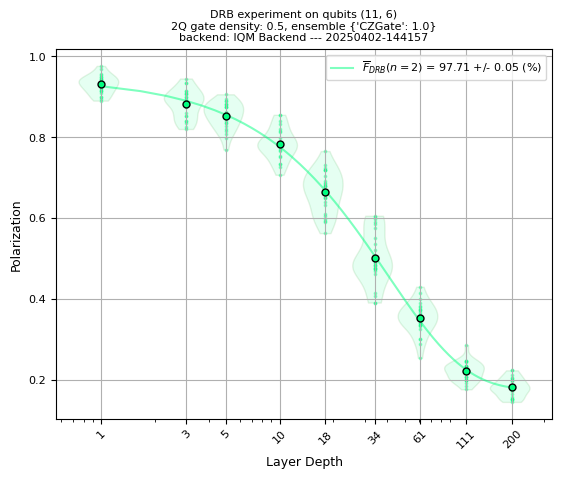

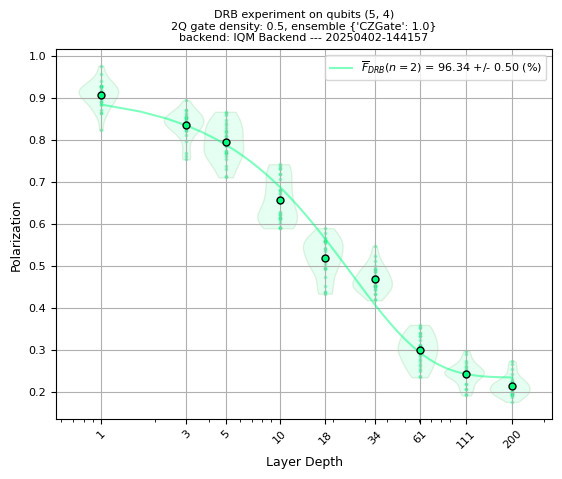

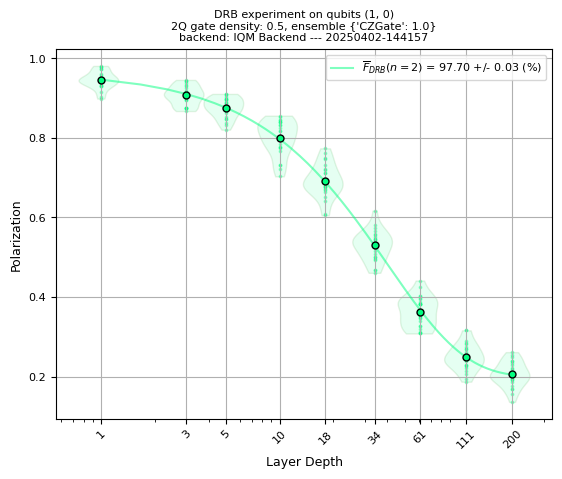

In [16]:
result_eplg.plot_all()